# Importing Libraries

In [1]:
import pandas as pd   #pandas for data processing and analysis
import numpy as np   #numpy for numerical calculations
import matplotlib.pyplot as plt  #visualising the data(graph)
from sklearn.ensemble import RandomForestRegressor  #as random forest is ensemble method in ML we use ensemble module 
                                                    #from sklearn
from sklearn.model_selection import train_test_split   #train_test_split to split the data into training and testing data
#ensemble: ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained 
#from any of the constituent learning algorithms alone.
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score  #these functions are used for evaluation of 
                                                                                #error functiion
    #metrics:metrics module is used to measure classification performance of ML model

%matplotlib inline


# Loading the data

In [2]:
df =pd.read_csv('wipro1year.csv')  #to load the data
df.info()   #to get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       361 non-null    object 
 1   Open Price                 361 non-null    float64
 2   High Price                 361 non-null    float64
 3   Low Price                  361 non-null    float64
 4   Close Price                361 non-null    float64
 5   WAP                        361 non-null    float64
 6   No.of Shares               361 non-null    int64  
 7   No. of Trades              361 non-null    int64  
 8   Total Turnover (Rs.)       361 non-null    float64
 9   Deliverable Quantity       361 non-null    int64  
 10  % Deli. Qty to Traded Qty  361 non-null    float64
 11  Spread High-Low            361 non-null    float64
 12  Spread Close-Open          361 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 3

# Data Processing

In [3]:
df.Date=pd.to_datetime(df.Date) #coverting the date column into datetime object of pandas

In [4]:
df.set_index('Date',inplace=True) #to set the index of date.Inplace isto rewrite the dataframe with index date
df.head() #to get the above date values dataset

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-11,556.4,558.90,551.50,554.30,555.319138,377905,9344,209857879.0,136241,36.05,7.40,-2.10
2021-06-10,544.8,555.40,544.80,554.25,552.805445,178119,4272,98465153.0,46140,25.90,10.60,9.45
2021-06-09,554.7,554.70,542.35,544.05,547.315129,274478,5417,150225962.0,60480,22.03,12.35,-10.65
2021-06-08,550.8,555.50,549.50,550.50,552.366234,297493,9634,164325088.0,115998,38.99,6.00,-0.30
2021-06-07,544.0,551.15,543.00,548.30,548.127323,186188,4157,102054730.0,53232,28.59,8.15,4.30


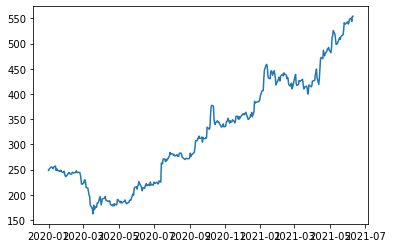

In [5]:
df=df.iloc[::-1] #iloc:integer location
df['Target']=df['Close Price'].shift(periods=-1) #our target is to find the close price of next day, 
plt.plot(df.index,df['Target']) #to plot the date vs price

In [30]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-07,544.0,551.15,543.00,548.30,548.127323,186188,4157,102054730.0,53232,28.59,8.15,4.30,550.50
2021-06-08,550.8,555.50,549.50,550.50,552.366234,297493,9634,164325088.0,115998,38.99,6.00,-0.30,544.05
2021-06-09,554.7,554.70,542.35,544.05,547.315129,274478,5417,150225962.0,60480,22.03,12.35,-10.65,554.25
2021-06-10,544.8,555.40,544.80,554.25,552.805445,178119,4272,98465153.0,46140,25.90,10.60,9.45,554.30
2021-06-11,556.4,558.90,551.50,554.30,555.319138,377905,9344,209857879.0,136241,36.05,7.40,-2.10,NaN


In [28]:
df.shape #rows and columns

(361, 13)

In [29]:
df_m=df

# Cleaning data

In [31]:
df_m=df_m.dropna() #to drop all rows with NaN(not available target values)

In [32]:
df_m.shape

(360, 13)

In [10]:
print(df_m.head())
df_m.tail()

            Open Price  High Price  Low Price  Close Price         WAP  \
Date                                                                     
2020-01-01      247.00      248.55     245.95       247.75  247.871771   
2020-01-02      248.70      249.90     246.05       248.25  248.469554   
2020-01-03      249.00      252.70     247.50       250.80  251.084194   
2020-01-06      251.85      254.40     250.15       252.15  252.232523   
2020-01-07      253.40      256.20     250.30       255.20  253.741838   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2020-01-01         85589            788            21215097.0   
2020-01-02         48265            856            11992383.0   
2020-01-03        173171           2632            43480501.0   
2020-01-06        171071           2169            43149670.0   
2020-01-07        166531           1865            42255882.0   

            Deliverable Q

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-04,544.4,545.70,540.45,541.10,542.725721,224064,4711,121605296.0,60601,27.05,5.25,-3.30,548.30
2021-06-07,544.0,551.15,543.00,548.30,548.127323,186188,4157,102054730.0,53232,28.59,8.15,4.30,550.50
2021-06-08,550.8,555.50,549.50,550.50,552.366234,297493,9634,164325088.0,115998,38.99,6.00,-0.30,544.05
2021-06-09,554.7,554.70,542.35,544.05,547.315129,274478,5417,150225962.0,60480,22.03,12.35,-10.65,554.25
2021-06-10,544.8,555.40,544.80,554.25,552.805445,178119,4272,98465153.0,46140,25.90,10.60,9.45,554.30


# Splitting the data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)  
#xtrain means to split data into training and testing data
#ytrain is target values of xtrain and ytest is target values of xtest
#sending the target values separately

In [12]:
model=RandomForestRegressor(n_estimators=500) #initializing the model with 500 decision trees  

In [13]:
model.fit(x_train,y_train) #splitting the model with training data

RandomForestRegressor(n_estimators=500)

In [14]:
model.score(x_test,y_test) #finding the accuracy of the model

0.9944713894700304

In [15]:
df.tail(10)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-05-31,539.45,540.35,531.20,538.90,537.118057,193982,3984,104191235.0,40528,20.89,9.15,-0.55,542.70
2021-06-01,539.90,547.00,539.80,542.70,543.086429,200765,4293,109032747.0,34577,17.22,7.20,2.80,543.05
2021-06-02,542.70,544.95,533.05,543.05,538.222906,177389,4185,95474823.0,35714,20.13,11.90,0.35,539.00
2021-06-03,546.00,550.00,538.35,539.00,542.258308,284277,8273,154151565.0,89737,31.57,11.65,-7.00,541.10
2021-06-04,544.40,545.70,540.45,541.10,542.725721,224064,4711,121605296.0,60601,27.05,5.25,-3.30,548.30
2021-06-07,544.00,551.15,543.00,548.30,548.127323,186188,4157,102054730.0,53232,28.59,8.15,4.30,550.50
2021-06-08,550.80,555.50,549.50,550.50,552.366234,297493,9634,164325088.0,115998,38.99,6.00,-0.30,544.05
2021-06-09,554.70,554.70,542.35,544.05,547.315129,274478,5417,150225962.0,60480,22.03,12.35,-10.65,554.25
2021-06-10,544.80,555.40,544.80,554.25,552.805445,178119,4272,98465153.0,46140,25.90,10.60,9.45,554.30


In [16]:
# To predict 11-6-21
model.predict([[544.80,555.40,544.80,554.25,552.805444674627636580,178119,4272,98465153.00,46140,25.90,10.60,9.45]])

array([545.9991])

In [17]:
model.score(x_test,y_test)  

0.9944713894700304

In [18]:
pred_y=model.predict(x_test)  #predicting the test data

In [34]:
#Root Mean Square
mean_squared_error(y_test,pred_y,squared=False)  

7.948181065035808

In [20]:
mean_squared_error(y_test,pred_y)

63.173582242593746

In [21]:
mean_absolute_error(y_test,pred_y)

5.477840740740731

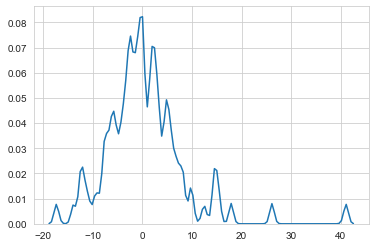

In [22]:
#difference of predicted values and true values
delta_y = y_test-pred_y;

import seaborn as sns;  #visualization library
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

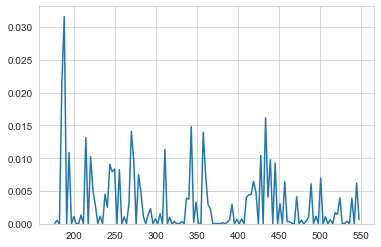

In [23]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=0.5)
plt.show()

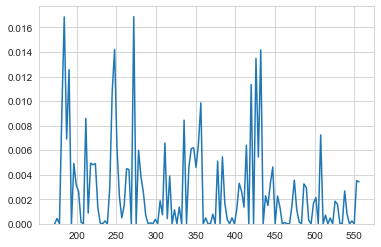

In [24]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

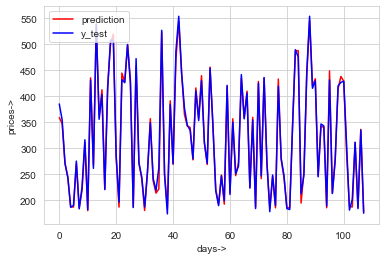

In [25]:
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

In [26]:
df.loc['2003-01-01']['Open Price']

KeyError: '2003-01-01'